# (LoansDataset )
## by (Mohamed Gamal )

## Preliminary Wrangling

> prosper is a website for mangment and awards loans for borrowers 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import io 
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import altair as alt 

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [183]:
#uploading data set 
loan = pd.read_csv('prosperLoanData.csv')
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [184]:
loan.shape

(113937, 81)

In [185]:
loan.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [186]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

> this a dataset of loans details from (https://www.prosper.com/)

>and this data contain the following
'ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable',
       'StatedMonthlyIncome', 'LoanKey', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
       'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber',
       'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginalAmount',
       'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey',
       'MonthlyLoanPayment', 'LP_CustomerPayments',
       'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees',
       'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
       'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations',
       'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount',
       'Investors'],
### What is/are the main feature(s) of interest in your dataset?

> 'ListingKey','ListingNumber','CreditGrade','ClosedDate','EmploymentStatus',
            'IsBorrowerHomeowner','BankcardUtilization','IncomeRange','IncomeVerifiable',
            'LoanCurrentDaysDelinquent','MemberKey','Investors',
          'BankcardUtilization','EstimatedLoss','AmountDelinquent','LoanOriginalAmount'

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  fisrt , foucse in features which related to the borrower himself . 
> second , relation between behavioure of the borrow a and how this reflect in increasing the investors or  not . 

### i'm Trying to check the criteria of person which get loans and the any parameter affact the increasing  the investmment to this loans 

#### So i will select this specific data which i think it will help me to extract answers for my question 

In [187]:
df= loan[['ListingKey','ListingNumber','CreditGrade','ClosedDate','EmploymentStatus',
            'IsBorrowerHomeowner','IncomeRange','IncomeVerifiable',
            'LoanCurrentDaysDelinquent','MemberKey','Investors',
          'BankcardUtilization','EstimatedLoss','EstimatedReturn', 
          'BorrowerAPR', 'LoanMonthsSinceOrigination', 
          'LoanOriginalAmount', 'MonthlyLoanPayment',
          'AmountDelinquent','Occupation',
          'Term','StatedMonthlyIncome',
          'ListingCategory (numeric)','ProsperRating (Alpha)','LoanStatus','AvailableBankcardCredit','Recommendations','ProsperScore','PercentFunded',
          'TradesOpenedLast6Months']]
df.head()

,ListingKey,ListingNumber,CreditGrade,ClosedDate,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,LoanCurrentDaysDelinquent,MemberKey,...,Term,StatedMonthlyIncome,ListingCategory (numeric),ProsperRating (Alpha),LoanStatus,AvailableBankcardCredit,Recommendations,ProsperScore,PercentFunded,TradesOpenedLast6Months
0,1021339766868145413AB3B,193129,C,2009-08-14 00:00:00,Self-employed,True,"$25,000-49,999",True,0,1F3E3376408759268057EDA,...,36,3083.333333,0,NaN,Completed,1500.0,0,NaN,1.0,0.0
1,10273602499503308B223C1,1209647,NaN,NaN,Employed,False,"$50,000-74,999",True,0,1D13370546739025387B2F4,...,36,6125.000000,2,A,Current,10266.0,0,7.0,1.0,2.0
2,0EE9337825851032864889A,81716,HR,2009-12-17 00:00:00,Not available,False,Not displayed,True,0,5F7033715035555618FA612,...,36,2083.333333,0,NaN,Completed,NaN,0,NaN,1.0,NaN
3,0EF5356002482715299901A,658116,NaN,NaN,Employed,True,"$25,000-49,999",True,0,9ADE356069835475068C6D2,...,36,2875.000000,16,A,Current,30754.0,0,9.0,1.0,0.0
4,0F023589499656230C5E3E2,909464,NaN,NaN,Employed,True,"$100,000+",True,0,36CE356043264555721F06C,...,36,9583.333333,2,D,Current,695.0,0,4.0,1.0,2.0


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ListingKey                  113937 non-null  object 
 1   ListingNumber               113937 non-null  int64  
 2   CreditGrade                 28953 non-null   object 
 3   ClosedDate                  55089 non-null   object 
 4   EmploymentStatus            111682 non-null  object 
 5   IsBorrowerHomeowner         113937 non-null  bool   
 6   IncomeRange                 113937 non-null  object 
 7   IncomeVerifiable            113937 non-null  bool   
 8   LoanCurrentDaysDelinquent   113937 non-null  int64  
 9   MemberKey                   113937 non-null  object 
 10  Investors                   113937 non-null  int64  
 11  BankcardUtilization         106333 non-null  float64
 12  EstimatedLoss               84853 non-null   float64
 13  EstimatedRetur

##### if  person owning home affect acceptance of bank to give loans ?

In [189]:
df.IsBorrowerHomeowner.value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

In [190]:
df.IsBorrowerHomeowner.value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

<Figure size 576x720 with 0 Axes>

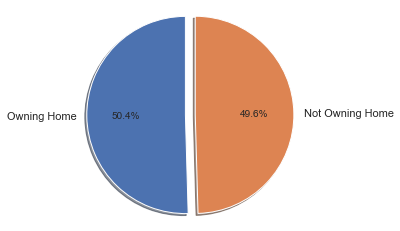

In [191]:
plt.figure(figsize = [8, 10])
labels = 'Owning Home', 'Not Owning Home'
sizes = df.IsBorrowerHomeowner.value_counts()
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal') 
plt.show()


##### answer : borrows  who have loans around 50% of them didn't own home so owning home not affect the granting loans to person .

In [192]:
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [193]:
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 14,4

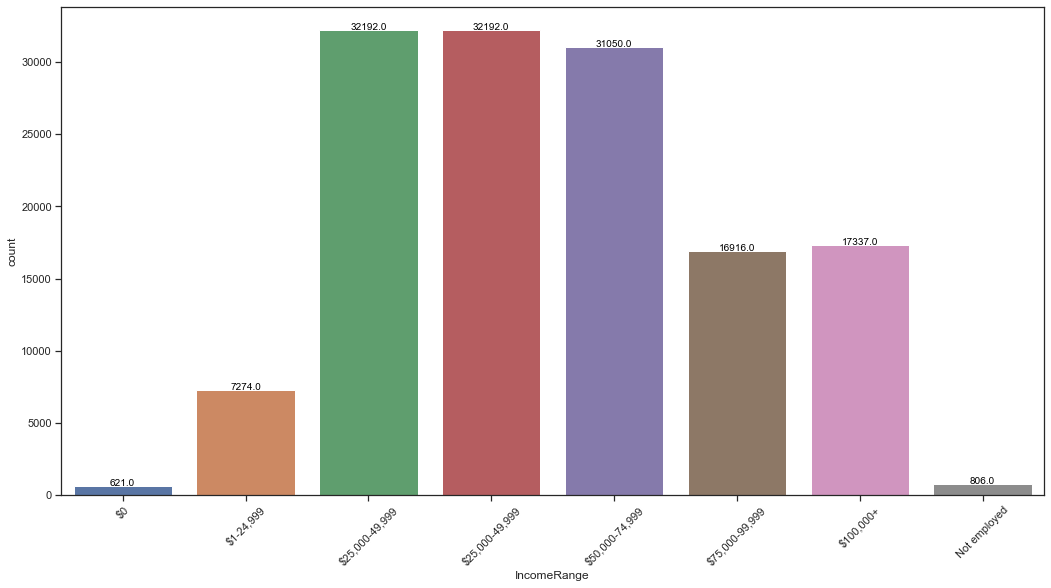

In [194]:
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
plt.figure(figsize = [14.7 , 8.27])
type_counts = df["IncomeRange"].value_counts()
type_order = ['$0','$1-24,999','$25,000-49,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not employed']
sb.countplot(data=df, x="IncomeRange", order=type_order , orient="h");
n_df = df["IncomeRange"].value_counts().sum()
# get the current tick locations and labels
locs, labels = plt.xticks(rotation=45) 

# loop through each pair of lodf.head cations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
plt.tight_layout();

####  we found most of the borrower have  income range from ( 25K : 50K) dollar 

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

#### credit grade count  to see  which credit Grades is trend 

In [195]:
df_credit_grade =  df.CreditGrade.value_counts()
df_credit_grade

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [196]:
df['BankcardUtilization'].dropna(inplace = True )

C:\Users\Gemy\Anaconda3\lib\site-packages\pandas\core\series.py:4494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [197]:
df['AvailableBankcardCredit'].dropna(inplace = True )

In [198]:
df['AvailableBankcardCredit'].shape

(106393,)

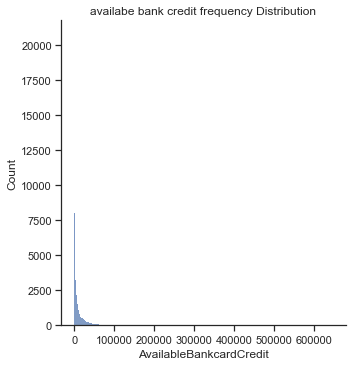

In [199]:
sb.displot(df , x="AvailableBankcardCredit" , bins = 'auto' )
plt.tight_layout();
plt.title('availabe bank credit frequency Distribution');

##### use a scale to make the disribuation is clear . 

C:\Users\Gemy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gemy\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Gemy\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


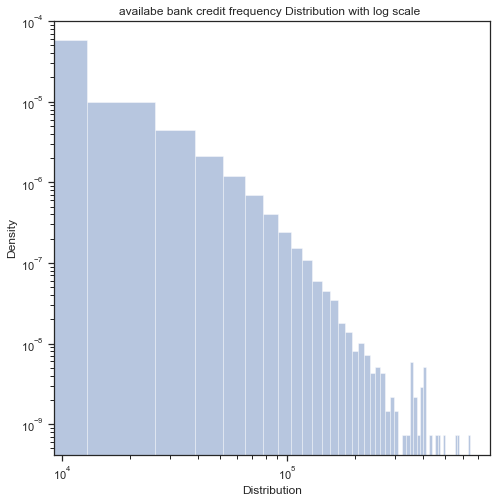

In [200]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sb.distplot(df['AvailableBankcardCredit']  , vertical= False , norm_hist=False,
            axlabel='Distribution',label=" Borrower Annual Percent Rate ")
plt.tight_layout();
plt.title('availabe bank credit frequency Distribution with log scale ');

In [201]:
type_counts = df["EmploymentStatus"].value_counts()
type_counts

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

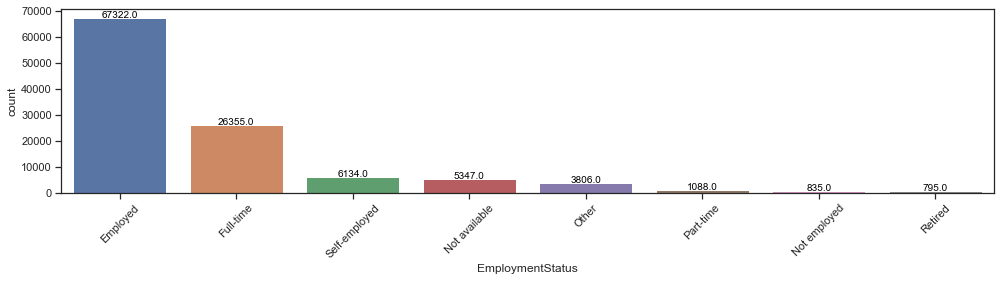

In [202]:
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
type_counts = df["EmploymentStatus"].value_counts()
type_order = type_counts.index
sb.countplot(data=df, x="EmploymentStatus", order=type_order);
n_df = df["EmploymentStatus"].value_counts().sum()
# get the current tick locations and labels
locs, labels = plt.xticks(rotation=45) 

# loop through each pair of lodf.head cations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
plt.tight_layout();

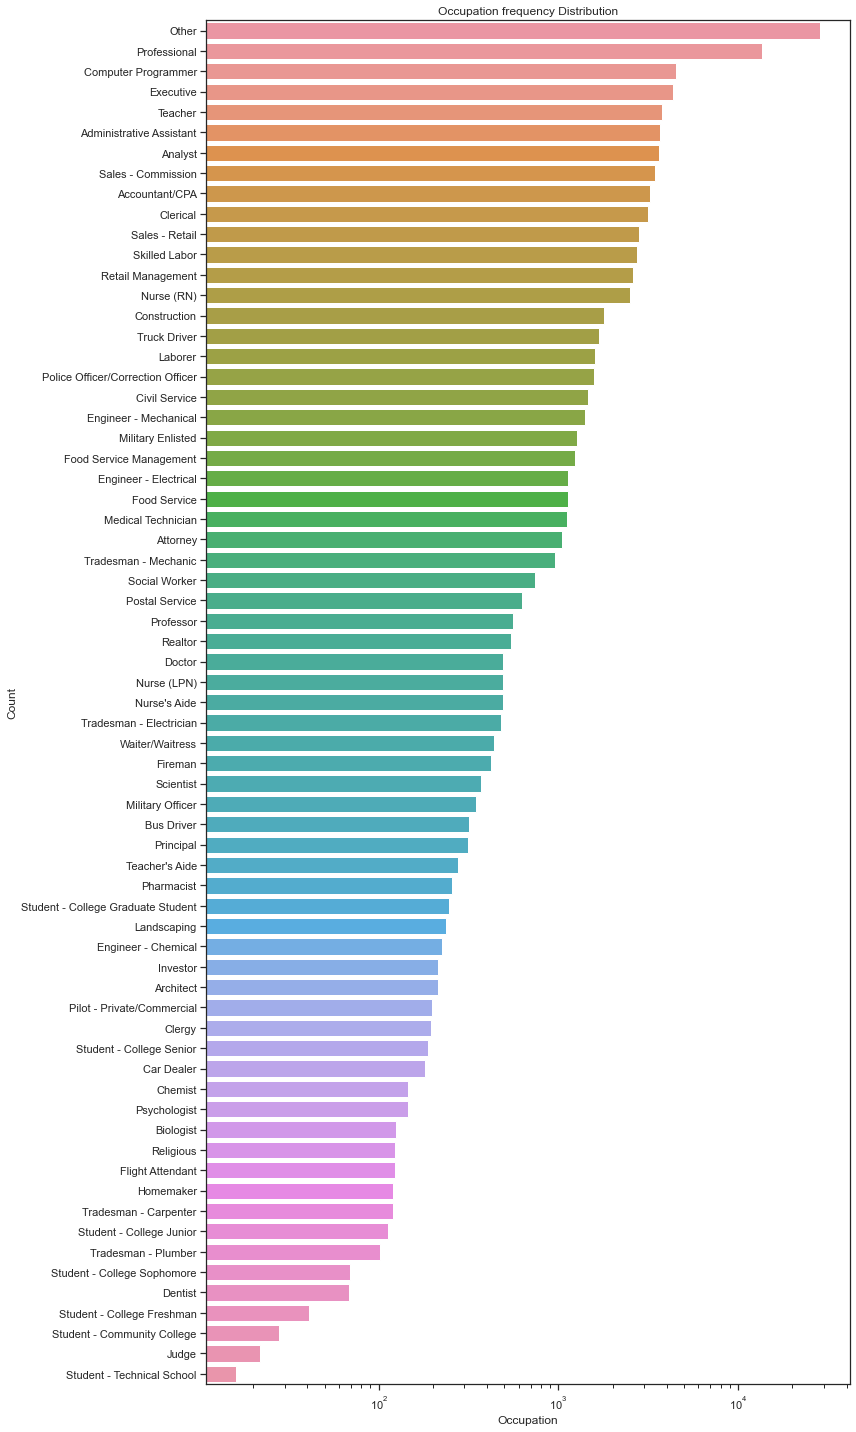

In [203]:
type_counts = df['Occupation'].value_counts()
type_order = type_counts.index
plt.figure(figsize=[12,20]);
sb.countplot(data = df,y= 'Occupation' , order=type_order);
plt.title('Occupation frequency Distribution');
plt.ylabel('Count')
plt.xlabel('Occupation')
plt.xscale ('log')
plt.tight_layout();


###### above plot to show trend of occupuation  and acorrding to graph above we found trend for people without recoded name , also second names with tricky name is Professional  , but the third is programmer  and less is student techincal school and i think is normal 
### in general we have maginfier which tells us which people occupation is tend to borrow .

C:\Users\Gemy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


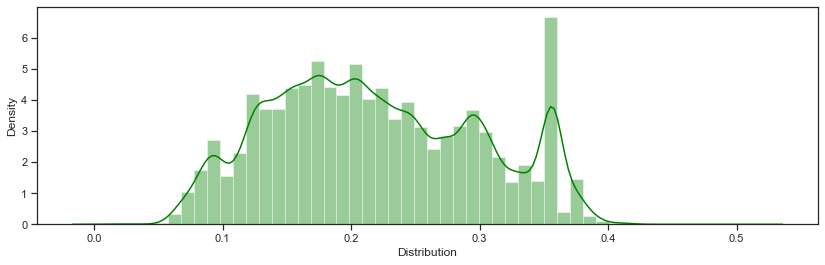

In [204]:
sb.distplot(df['BorrowerAPR']  , color='Green', vertical= False , norm_hist=False,
            axlabel='Distribution', label=" Borrower Annual Percent Rate ")

####  represensting The Borrower's Annual Percentage Rate (APR) for the loan distubation to explore the trend

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> drawing a conculasion about the borower (ownhome or not , his occupation , income range , annual rate for loans )
> borrows  who have loans around 50% of them didn't own home so owning home not affect the granting loans to person .
>  most of the borrower have income range from ( 25K : 50K) dollar
>  most of the borrowe is empolyed . 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> scale is used to show the distribution of bank utilization !
> also occupation 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data.
assuring that all  variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### in this Section , some relation between  two factor to the study the effect of some varible to each other  are  represented .

##### a relation between 2 varible which will study relation between  lonaer criteria and investment to show if this  studied criteria  affect the investment .

In [205]:
#dividing the in two data set depending on owning home or not .
df_home_True = df.query('IsBorrowerHomeowner ==  True ')
df_home_False = df.query('IsBorrowerHomeowner ==  False ')
df_home_False.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56459 entries, 1 to 113936
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ListingKey                  56459 non-null  object 
 1   ListingNumber               56459 non-null  int64  
 2   CreditGrade                 16388 non-null  object 
 3   ClosedDate                  29202 non-null  object 
 4   EmploymentStatus            54795 non-null  object 
 5   IsBorrowerHomeowner         56459 non-null  bool   
 6   IncomeRange                 56459 non-null  object 
 7   IncomeVerifiable            56459 non-null  bool   
 8   LoanCurrentDaysDelinquent   56459 non-null  int64  
 9   MemberKey                   56459 non-null  object 
 10  Investors                   56459 non-null  int64  
 11  BankcardUtilization         51414 non-null  float64
 12  EstimatedLoss               40005 non-null  float64
 13  EstimatedReturn             40

In [206]:
#grouping the dataframe accroding to income range and owning home and get size .
ct_counts = df.groupby(['IncomeRange', 'IsBorrowerHomeowner']).size()
ct_counts = ct_counts.reset_index(name='count')

In [207]:
#making a pivot table IsBorrowerHomeowner is column and row IncomeRange 
ct_counts = ct_counts.pivot(index = 'IncomeRange', columns = 'IsBorrowerHomeowner', values = 'count')

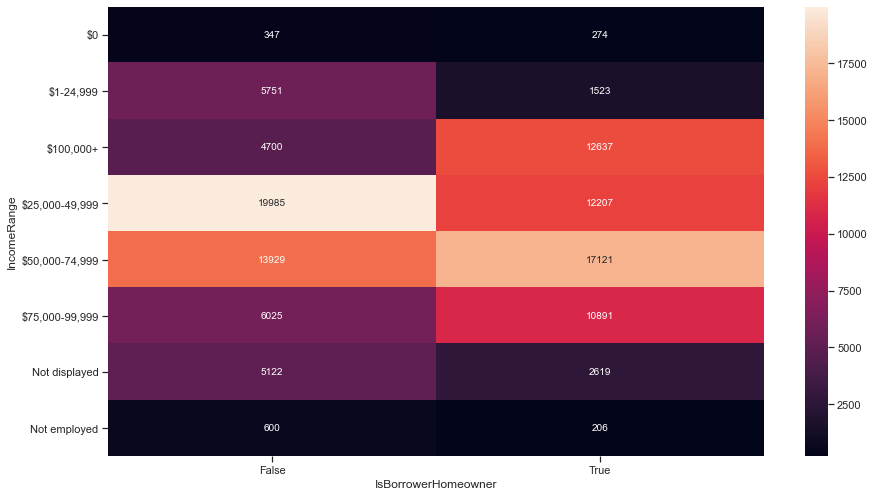

In [208]:
fig, ax = plt.subplots(figsize= [ 14.70, 8.27])
sb.heatmap(ct_counts , annot = True, fmt = 'd' , ax = ax )


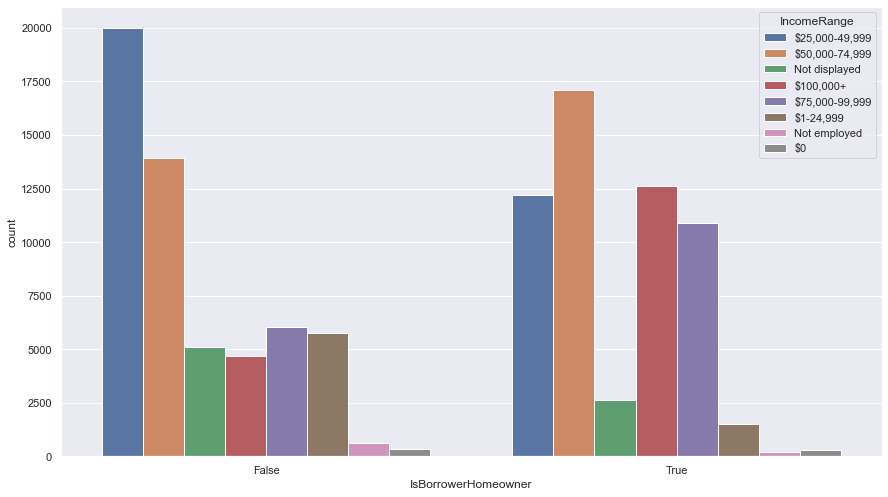

In [209]:
sb.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize= [ 14.70, 8.27])
sb.countplot(data = df, x = 'IsBorrowerHomeowner', hue= 'IncomeRange' , ax = ax )

#### different method is used  to observe the relation between owning home and income range  and liky found that the range of 100k dollar is person who owning home is more . 


In [210]:
df['StatedMonthlyIncome'].head()

0    3083.333333
1    6125.000000
2    2083.333333
3    2875.000000
4    9583.333333
Name: StatedMonthlyIncome, dtype: float64

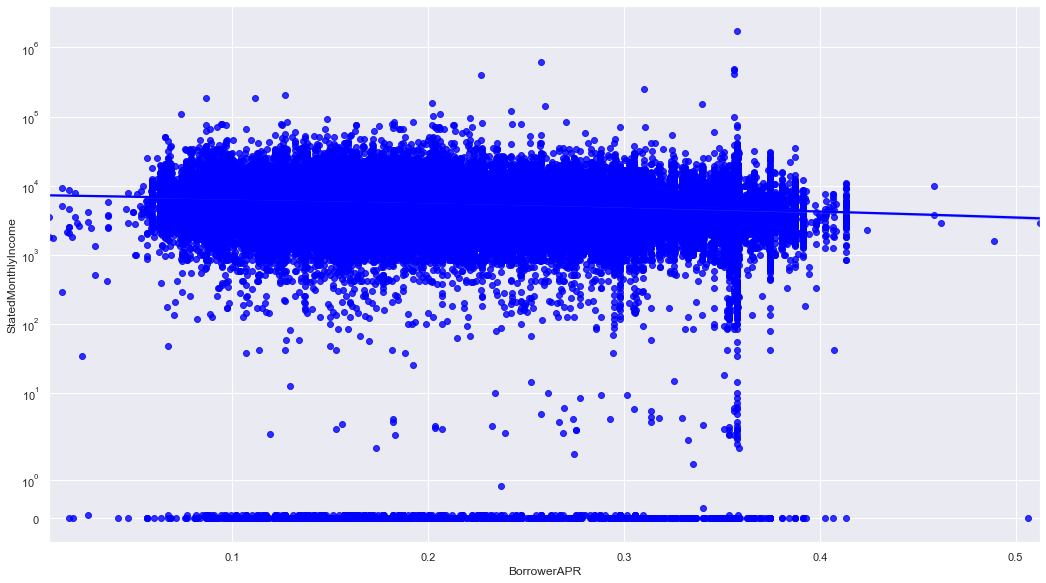

In [211]:
#regression plot to show the line which represent the correlation .
fig, ax = plt.subplots(figsize= [ 14.70, 8.27])
sb.regplot(data = df,y = 'StatedMonthlyIncome', x = 'BorrowerAPR', color = 'blue'  , ax = ax );
plt.xlabel('BorrowerAPR')
plt.ylabel('StatedMonthlyIncome')
plt.yscale('symlog')
plt.tight_layout();

In [212]:
#also extract this relation numerically 
df['BorrowerAPR'].corr(df['StatedMonthlyIncome'])

-0.08233849089725208

##### Test relation between two quantattive values 

###  correlation factor is very small of colleration and graph 

In [213]:
df["LoanStatus"].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

#### I will drop completed  , final pyment in progresss and cancelled status 

In [214]:
#remove loanStatus which will not make sense .
df.drop(df[df['LoanStatus'] == 'Completed' ].index, inplace=True)
df.drop(df[df['LoanStatus'] == 'FinalPaymentInProgress'].index, inplace=True)
df.drop(df[df['LoanStatus'] == 'Cancelled' ].index, inplace=True)

C:\Users\Gemy\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [215]:
df['LoanStatus']

1         Current
3         Current
4         Current
5         Current
6         Current
           ...   
113930    Current
113931    Current
113932    Current
113934    Current
113936    Current
Name: LoanStatus, Length: 75653, dtype: object

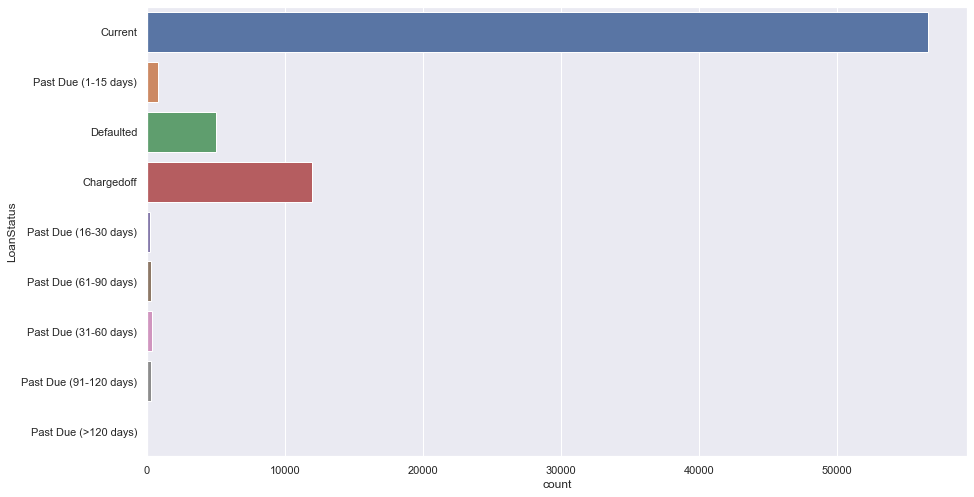

In [216]:
#using countplot to show the repeated of each status 
ax.set(yscale="log")
sb.set_theme(style="darkgrid")
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize= [ 14.70, 8.27])
sb.countplot(data = df, y = 'LoanStatus' , ax=ax )

##### represent distribution of loan status 

C:\Users\Gemy\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


<Figure size 1058.4x595.44 with 0 Axes>

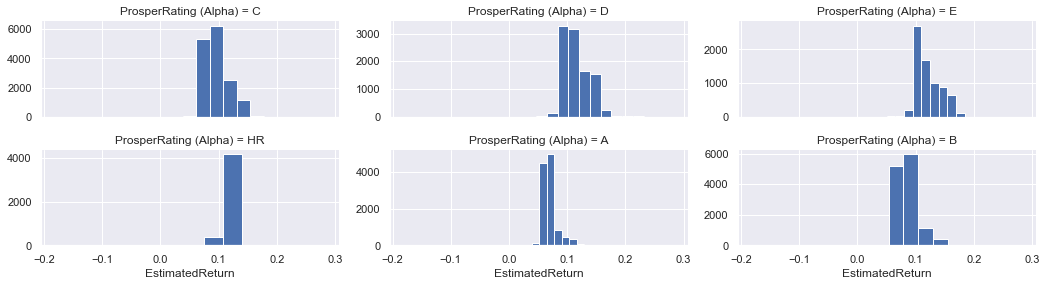

In [217]:
plt.figure(figsize=[ 14.70, 8.27])
a=np.random.random(100)*0.5 #a uniform distribution
b=np.random.normal(100)*0.5 #a normal distribution
c=np.random.random(100)*0.5 #a uniform distribution
d=np.random.random(100)*0.5 #a uniform distribution
e=np.random.random(100)*0.5 #a uniform distribution
f=np.random.random(100)*0.5 #a uniform distribution
#bins 
bins=np.histogram(np.hstack((a,b,c,d,e,f)), bins=40)[1] #get the bin edges
Rating = ['C',  'D', 'E','HR','A','B']
Classes = pd.api.types.CategoricalDtype(ordered=True, categories = Rating);
df["ProsperRating (Alpha)"] = df["ProsperRating (Alpha)"].astype(Classes);
#Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = df , col = "ProsperRating (Alpha)" , col_wrap=3, sharey=False , height = 8.27/4,  aspect = (14.70/3)/(8.27/4));
g.map(plt.hist, "EstimatedReturn" );
plt.tight_layout();


#### representing sample prospor rating and estimated return 

C:\Users\Gemy\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


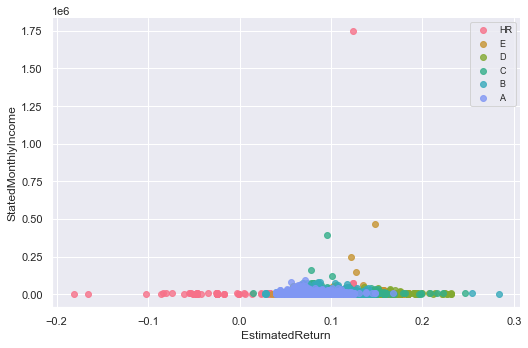

In [218]:
g = sb.FacetGrid(data = df, hue = 'ProsperRating (Alpha)', hue_order = ['HR','E','D','C','B','A','AA'], size = 5, aspect = 1.5 , palette="husl")
g.map(sb.regplot, "EstimatedReturn","StatedMonthlyIncome", fit_reg = False);
plt.legend(loc=1, fontsize = 9)

##### this a relation between  Estimated return and Stated monthly income  with respect to prosper raring 

#### this a relation between Borrow annaul per revnue  and Stated monthly income with respect to prosper raring

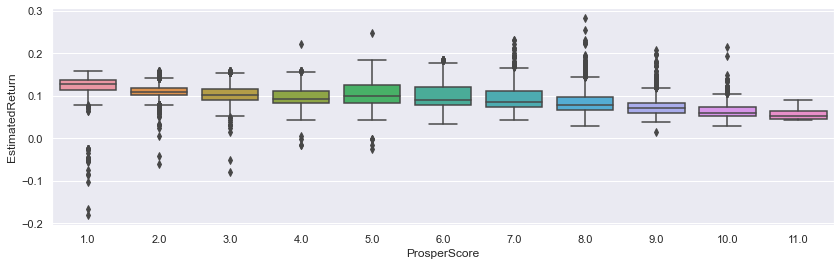

In [219]:
sb.boxplot(data = df , x='ProsperScore', y = 'EstimatedReturn')

#### five number analysis between  prospor score and Estimated Return 

In [220]:
df.dropna(subset = ['ProsperScore', 'Investors'], inplace=True)

C:\Users\Gemy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [221]:
df['Investors'].head(20)

1       1
3     158
4      20
5       1
6       1
7       1
8       1
9       1
10     19
12      1
13    171
14    371
15     10
16      8
18    303
19      1
20      1
22     94
23     30
24      1
Name: Investors, dtype: int64

C:\Users\Gemy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


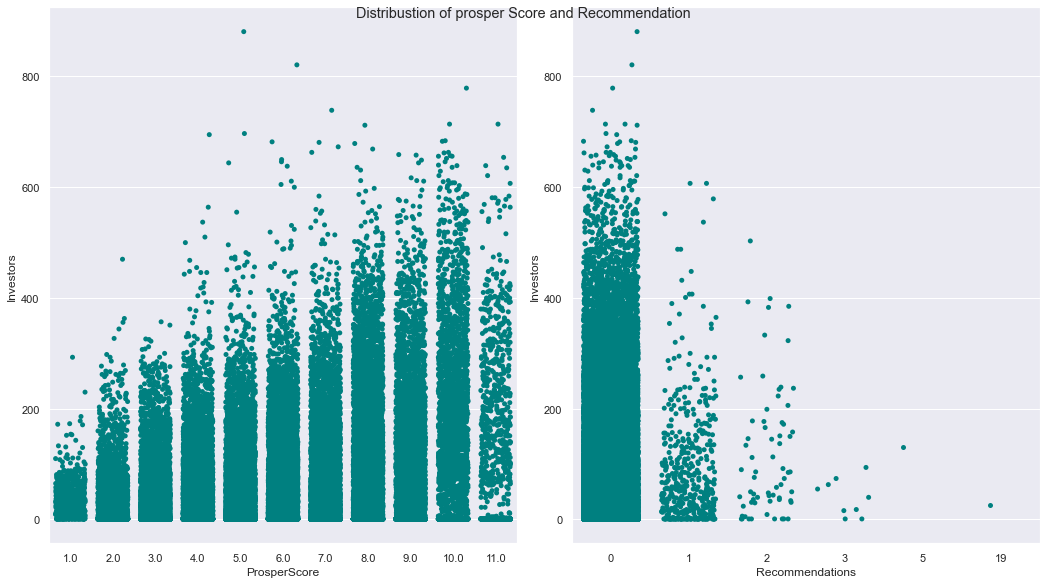

In [222]:
df.dropna(subset =  ['ProsperScore', 'Investors'], inplace = True )
df['Investors'].head(20)
plt.figure(figsize = [14.7, 8.27])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.stripplot(data = df, y = 'Investors', x = 'ProsperScore' , jitter = 0.35 , color =  'teal') 
plt.xlabel('ProsperScore')
plt.ylabel('Investors');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
sb.stripplot(data = df, y = 'Investors', x = 'Recommendations' , jitter = 0.35 , color =  'teal')
plt.xlabel('Recommendations')
plt.ylabel('Investors')
plt.suptitle('Distribustion of prosper Score and Recommendation')          
plt.tight_layout();

##### this relation to assure the affect of recoomandation and prospor score on recommandation 

#### in income range from 50,000 to 74.999  ,   and from range  have the heighst income range 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> fisrt i discussed the realtion between income of borrower and income . 
> second showed the correlation BorrowerAnnual per rate   Stated Monthly Income'
> representing sample prospor rating and estimated return. 
> this a relation between Estimated return and Stated monthly income with respect to prosper raring.
> this a relation between Borrow annaul per revnue and Stated monthly income with respect to prosper raring
this relation to assure the affect of recoomandation and prospor score on recommandation
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> negative  weak correlation correlation BorrowerAnnual per rate   Stated Monthly Income.
> postive relation between prospor score and investors  also unlikly negative realtion between recommendation and investors 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

C:\Users\Gemy\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


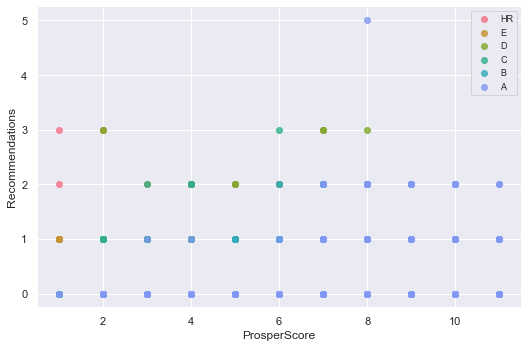

In [223]:
#relation between prosperscore , recommendation with respect ProsperRating 
g = sb.FacetGrid(data = df, hue = 'ProsperRating (Alpha)', hue_order = ['HR','E','D','C','B','A','AA'], size = 5, aspect = 1.5 , palette="husl")
g.map(sb.regplot,"ProsperScore" , "Recommendations", fit_reg = False);
plt.legend(loc=1, fontsize = 9)

In [224]:
df['LoanOriginalAmount']

1         10000
3         10000
4         15000
5         15000
6          3000
          ...  
113930     3000
113931    25000
113932    10000
113934    10000
113936     2000
Name: LoanOriginalAmount, Length: 64984, dtype: int64

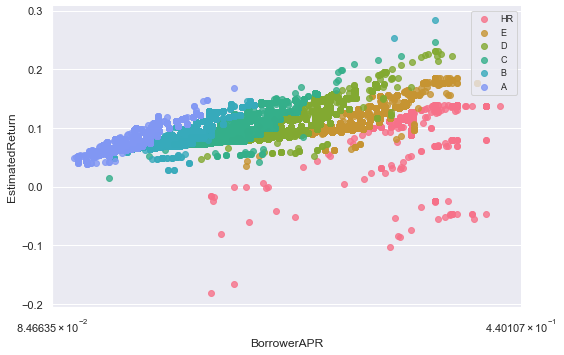

In [225]:
g = sb.FacetGrid(data = df, hue = 'ProsperRating (Alpha)', hue_order = ['HR','E','D','C','B','A','AA'], size = 5, aspect = 1.5 , palette="husl")
g.map(sb.regplot, "BorrowerAPR","EstimatedReturn", fit_reg = False);
plt.legend(loc=1, fontsize = 9)
plt.xscale('symlog')

In [226]:
df["BorrowerAPR"].corr(df["EstimatedReturn"])

0.8320596854818636

##### this a relation between Borrow annaul per revnue and Stated monthly income with respect to prosper raring

<Figure size 1058.4x595.44 with 0 Axes>

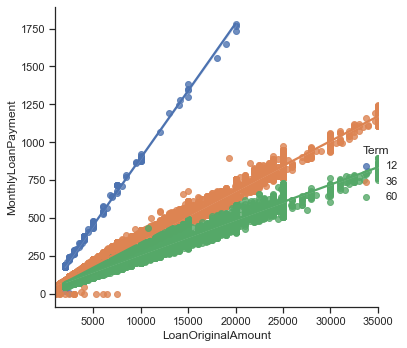

In [227]:
plt.figure(figsize = [14.7, 8.27])
sb.set_theme(style="ticks")

# Load the penguins dataset
penguins = sb.load_dataset("penguins")

# Show the joint distribution using kernel density estimation
g = sb.lmplot(
    data=df,
    y = 'MonthlyLoanPayment', x = 'LoanOriginalAmount', hue= 'Term',
     height=5,
)
plt.tight_layout();

#### show realtion between term of loans period by month and loan original amount with respect to monthly loan payment 

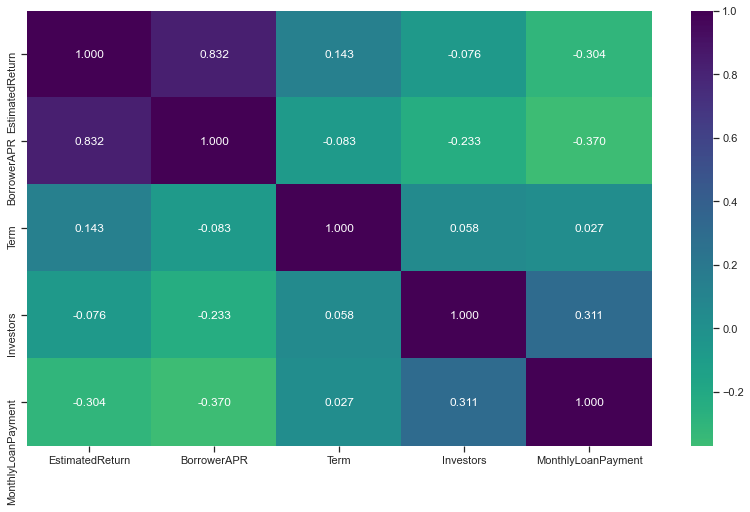

In [228]:
df_numeric = ['EstimatedReturn', 'BorrowerAPR', 'Term', 'Investors','MonthlyLoanPayment']
df_categoric = ['IncomeRange', 'CreditScore', 'IsBorrowerHomeowner']

# correlation plot
plt.figure(figsize = [14, 8])
sb.heatmap(df[df_numeric].corr(), annot = True, fmt = '.3f', cmap = 'viridis_r', center = 0 , label = 'correlation between some numeric values ')
plt.show()
g.set_axis_labels(x_var="Percentage Depth", y_var="Number of Defects")

##### heat map for some numeric values which represents correlation between this numeric values 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> relation between prospor score and recommendation with referance to prospor rating alpha
  major of with A score
>this a relation between Borrow annaul per revnue and Stated monthly income with respect to prosper raring
> show realtion between term of loans period by month and loan original amount with respect to monthly loan payment 
### Were there any interesting or surprising interactions between features?
> correlation between BorrowerAPR  EstimatedReturn is 0.8 strong postive relation 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [230]:
!jupyter nbconvert Visualizationudacityproject.ipynb --to slides --post serve --template output_toggle

Traceback (most recent call last):
  File "C:\Users\Gemy\Anaconda3\lib\site-packages\traitlets\traitlets.py", line 528, in get
    value = obj._trait_values[self.name]
KeyError: 'template_paths'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Gemy\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Gemy\Anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Gemy\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Gemy\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\Gemy\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 519, in convert_notebooks
    self.exporter = cls(config=self.config)
